In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import networkx as nx

from sklearn.metrics.pairwise import cosine_similarity

import matplotlib.pyplot as plt

from keras.layers import Input, Dense, Dropout
from keras.models import Model
from keras.constraints import unit_norm

Using Theano backend.
Using cuDNN version 5110 on context None
Mapped name None to device cuda: GeForce GT 650M (0000:01:00.0)


In [2]:
G = nx.read_gml("galFiltered.gml").to_undirected()

In [3]:
genes_in_network = nx.get_node_attributes(G, "label").values()

In [4]:
expression_data = pd.read_csv("galExpData.csv")

In [5]:
expression_data

,GENE,COMMON,gal1RGexp,gal4RGexp,gal80Rexp,gal1RGsig,gal4RGsig,gal80Rsig
0,YHR051W,COX6,-0.034,0.111,-0.304,3.757200e-01,1.562400e-02,7.913400e-06
1,YHR124W,NDT80,-0.090,0.007,-0.348,2.714600e-01,9.643300e-01,3.447600e-01
2,YKL181W,PRS1,-0.167,-0.233,0.112,6.271200e-03,7.894000e-04,1.440600e-01
3,YGR072W,UPF3,0.245,-0.471,0.787,4.104500e-04,7.517800e-04,1.371300e-05
4,YHL020C,OPI1,0.174,-0.015,0.151,1.401600e-04,7.191200e-01,1.539500e-02
5,YGR145W,YGR145W,0.387,-0.577,-0.088,5.379200e-03,8.273300e-03,7.641800e-01
6,YGL041C,YGL041C,0.285,-0.086,0.103,4.460500e-04,4.507900e-01,7.030400e-01
7,YGR218W,CRM1,-0.018,-0.001,-0.018,6.138100e-01,9.794000e-01,8.096900e-01
8,YOR202W,HIS3,-0.432,-0.710,0.239,1.097900e-02,1.797900e-04,5.489500e-03
9,YCR005C,CIT2,0.085,0.392,0.464,4.189800e-02,1.530500e-06,2.743600e-06


In [6]:
genes_in_expression_data = expression_data.loc[:,["GENE"]].as_matrix().flatten()

In [7]:
genes_in_network = [gene for gene in genes_in_network if gene in genes_in_expression_data]

In [8]:
expression_data_matrix = expression_data.loc[:,["gal1RGsig", "gal4RGsig", "gal80Rsig"]].as_matrix()

In [9]:
significance_similarity = cosine_similarity(expression_data_matrix) - np.identity(expression_data_matrix.shape[0])

In [10]:
significance_similarity = pd.DataFrame(significance_similarity, 
                                       columns=genes_in_expression_data, index=genes_in_expression_data)

In [11]:
significance_similarity = significance_similarity.loc[genes_in_network, genes_in_network].as_matrix()

In [12]:
significance_similarity /= significance_similarity.sum(axis=0)

In [13]:
# subnetwork that is labelled
nodes_of_interest = [k for k, v in nx.get_node_attributes(G, "label").items() if v in genes_in_network]
G = G.subgraph(nodes_of_interest)

In [14]:
A = nx.adjacency_matrix(G)
W = A.dot(np.diag(1./np.array(nx.degree(G).values())))

In [15]:
W = pd.DataFrame(W, index=genes_in_network, columns=genes_in_network)

W = W.loc[genes_in_network, genes_in_network].as_matrix()

In [17]:
# transition matrix
T = 0.5 * np.identity(len(genes_in_network)) + 0.4 * W + 0.1 * significance_similarity

In [18]:
def matrix_multiply(M, n):
    if n == 0:
        return np.identity(M.shape[0])
    return M.dot(matrix_multiply(M, n - 1))

In [19]:
target_distributions = matrix_multiply(T, 3)

In [20]:
target_distributions = target_distributions.transpose()

In [21]:
N, _ = target_distributions.shape

In [22]:
inputs = np.identity(N)

In [23]:
x = Input(batch_shape=(50, N))
y = Dense(256, activation="tanh")(x)
y = Dropout(0.5)(y)
y = Dense(128, activation="tanh")(y)
y = Dropout(0.5)(y)
y = Dense(64, activation="tanh")(y)
y = Dropout(0.5)(y)
embedding = Dense(2, activation="linear")(y)
observation_probabilities = Dense(N, activation="softmax")(embedding)

model = Model(x, observation_probabilities)

In [24]:
model.compile(loss="kld", optimizer="adam")

In [25]:
model.fit(inputs, target_distributions, batch_size=50, epochs=50000, verbose=False)

In [40]:
w = model.layers[-1].get_weights()
weights = w[0]
biases = w[1]

In [26]:
embedder = Model(x, embedding)

In [27]:
embeddings = embedder.predict(inputs)

In [43]:
embeddings = embeddings + weights.transpose()

In [35]:
s = [10*np.exp(p ** 2 / (2 * 0.5 ** 2)) for p in expression_data_matrix[:,0] ]

In [36]:
s

[13.26217674182752,
 11.587954532102282,
 10.000786589923363,
 10.000003369384618,
 10.000000392896521,
 10.000578732598724,
 10.000003979212842,
 21.244765278618019,
 10.002411059433669,
 10.035170551831129,
 10.000014492882254,
 10.000000026400285,
 19.419006403660262,
 10.071051466325745,
 10.012173661813875,
 10.000000018508747,
 68.103854558089893,
 10.000000009260486,
 10.061920301195038,
 10.000277486550669,
 20.173418705890597,
 10.001333825395399,
 10.246487092862687,
 10.350046207498755,
 43.818915855198668,
 10.00000000013258,
 10.00000002374432,
 10.000000000170481,
 10.003912369632248,
 10.000016507458625,
 10.000001154497419,
 10.000394777229047,
 10.573346741338341,
 11.560044107840001,
 10.0,
 13.898574781769288,
 10.032657637768637,
 10.023129029809336,
 18.896564804949779,
 10.001435937665981,
 10.060641335829247,
 10.716100564899074,
 10.133519965130693,
 10.000000559852737,
 10.000001119023494,
 10.000076887185381,
 10.000010296417303,
 12.664679507876407,
 10.93921

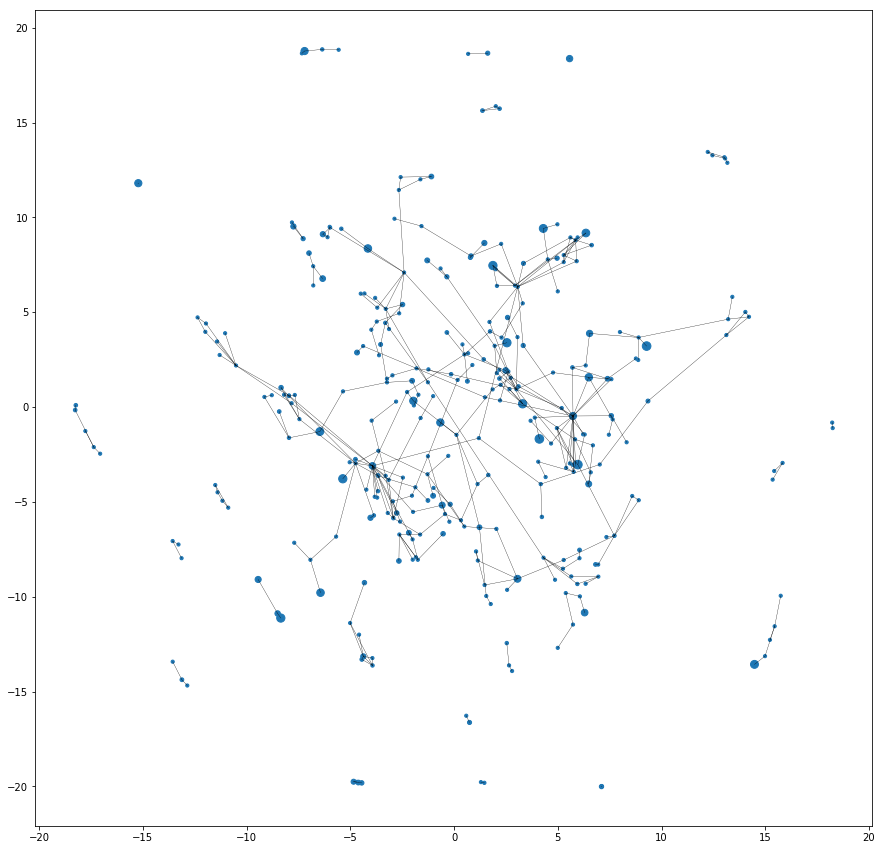

In [44]:
plt.figure(figsize=(15, 15))

# for label, i, j in zip(G.nodes(), embeddings[:, 0], embeddings[:, 1]):
#     plt.annotate(
#         label,
#         xy=(i, j), xytext=(-20, 20),
#         textcoords='offset points', ha='right', va='bottom',
#         bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
#         arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

nodes = np.array(G.nodes())
for n1, n2 in G.edges():
    i, = np.where(nodes == n1)
    j, = np.where(nodes == n2)
    plt.plot(embeddings[(i, j), 0], embeddings[(i, j), 1], c="k", 
#              linewidth = 3 * np.exp(- np.linalg.norm(S_encoded[i] - S_encoded[j]) ** 2 / (2 * 0.5 ** 2) ))
             linewidth = 0.3)


plt.scatter(embeddings[:,0], embeddings[:,1], s = s)

In [45]:
prediction = model.predict(inputs)

In [46]:
prediction[0,]

array([  8.33312050e-03,   2.10033003e-02,   5.39518669e-06,
         6.92430649e-06,   1.02655329e-04,   1.71546638e-02,
         1.01626441e-02,   1.77449780e-03,   5.74044138e-03,
         5.92292228e-04,   4.20188822e-04,   4.39176598e-04,
         9.85227805e-03,   1.79636162e-02,   2.06844397e-02,
         4.99295490e-03,   3.29494919e-03,   5.27822413e-03,
         1.79736651e-02,   6.34684647e-03,   1.43557857e-03,
         3.04787164e-03,   5.01007494e-03,   5.56975510e-03,
         4.08944637e-02,   7.10405409e-03,   4.89437208e-03,
         3.24273482e-03,   9.86160152e-03,   1.47222169e-03,
         2.27856846e-03,   2.54402868e-03,   5.77751733e-03,
         2.33190577e-03,   2.75494996e-03,   4.34787245e-03,
         4.34774952e-03,   9.86221526e-03,   3.17245047e-03,
         3.28218355e-03,   1.02240173e-03,   1.06761965e-03,
         5.55202016e-04,   8.53452925e-03,   4.00705542e-03,
         5.29208127e-03,   6.03260519e-03,   1.30941975e-03,
         5.51164849e-04,

In [47]:
target_distributions[0,]

array([  2.05171751e-01,   3.43138829e-01,   2.86831684e-04,
         3.88805866e-04,   1.77991540e-03,   8.11836354e-02,
         1.18035222e-02,   8.72519140e-04,   1.43972205e-03,
         9.69268948e-04,   8.47304821e-04,   9.58073385e-04,
         9.91897687e-04,   1.49109304e-03,   1.32536414e-03,
         6.60670185e-04,   6.91185018e-04,   9.53893416e-04,
         1.45319307e-03,   8.87425319e-04,   4.44979411e-04,
         8.50476522e-04,   7.92431204e-04,   7.66149833e-04,
         3.47146921e-03,   7.95593188e-04,   9.01244131e-04,
         6.57745675e-04,   8.95601444e-04,   7.15461008e-04,
         5.41775535e-04,   6.20039674e-04,   1.10537573e-03,
         5.47027206e-04,   6.07464617e-04,   7.58096408e-04,
         7.58092163e-04,   8.91122404e-04,   5.67620312e-04,
         1.94111216e-04,   1.15714473e-03,   1.04759490e-03,
         7.87113558e-04,   1.16392589e-03,   7.49678234e-04,
         1.32729400e-03,   9.73815085e-04,   5.65605848e-04,
         9.88624347e-04,